In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.max_columns = None

In [2]:
dataset = pd.read_csv('train.csv')

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
train_dataset,val_dataset = train_test_split(dataset,random_state=42,test_size=0.10)

In [5]:
print(train_dataset.shape)
print(val_dataset.shape)

(37800, 785)
(4200, 785)


In [6]:
train_dataset.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455

In [7]:
train_imgs = train_dataset.iloc[:,1:].values
train_labels = train_dataset['label'].values

In [31]:
val_imgs = val_dataset.iloc[:,1:].values
val_labels = val_dataset['label'].values

In [8]:
train_imgs = train_imgs/255.0


In [32]:
val_imgs = val_imgs/255.0


In [9]:
train_labels[0]

8

In [10]:
def plot_img(img,label=None):
#     img = img.values
    img = img.reshape((28,28))
    plt.imshow(img,cmap=plt.cm.binary)
    if label:
        plt.xlabel(label)

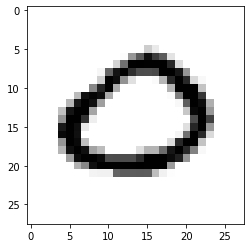

In [33]:
plot_img(train_imgs[1000],train_labels[1000])

In [12]:
train_labels[1000]

0

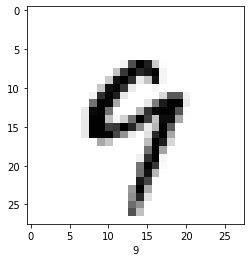

In [34]:
plot_img(train_imgs[255],train_labels[255])

In [14]:
# temp = train_imgs.reshape((37800,28,28,1))
train_imgs_exp = train_imgs.reshape((train_imgs.shape[0],28,28,1))

In [35]:
val_imgs_exp = val_imgs.reshape((val_imgs.shape[0],28,28,1))

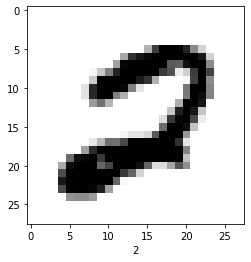

In [36]:
plot_img(val_imgs[255],val_labels[255])

In [16]:
from tensorflow.keras.models import Sequential

In [18]:
from tensorflow.keras import layers

In [39]:
classifier = Sequential([
                layers.Conv2D(8,(3,3), padding='same',activation='relu',input_shape=(28,28,1)),
                layers.MaxPool2D((2,2),strides=2),
    
                layers.Dropout(0.10),
                layers.Flatten(),
                layers.Dense(64,activation='relu'),
                layers.Dense(10,activation='softmax')
])

In [40]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
classifier.compile(optimizer='adam',loss=SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [41]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 8)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                100416    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 101,146
Trainable params: 101,146
Non-trainable params: 0
________________________________________________

In [42]:
history = classifier.fit(train_imgs_exp,train_labels,epochs=5,validation_data=(val_imgs_exp,val_labels))

Train on 37800 samples, validate on 4200 samples
Epoch 1/5
37800/37800 [==============================] - 18s 474us/sample - loss: 0.2852 - accuracy: 0.9171 - val_loss: 0.1321 - val_accuracy: 0.9602
Epoch 2/5
37800/37800 [==============================] - 16s 426us/sample - loss: 0.1101 - accuracy: 0.9668 - val_loss: 0.0877 - val_accuracy: 0.9738
Epoch 3/5
37800/37800 [==============================] - 16s 418us/sample - loss: 0.0803 - accuracy: 0.9748 - val_loss: 0.0730 - val_accuracy: 0.9769
Epoch 4/5
37800/37800 [==============================] - 17s 443us/sample - loss: 0.0647 - accuracy: 0.9803 - val_loss: 0.0728 - val_accuracy: 0.9752
Epoch 5/5
37800/37800 [==============================] - 16s 431us/sample - loss: 0.0539 - accuracy: 0.9826 - val_loss: 0.0654 - val_accuracy: 0.9798


Text(0.5, 1.0, 'Training and Validation Losses')

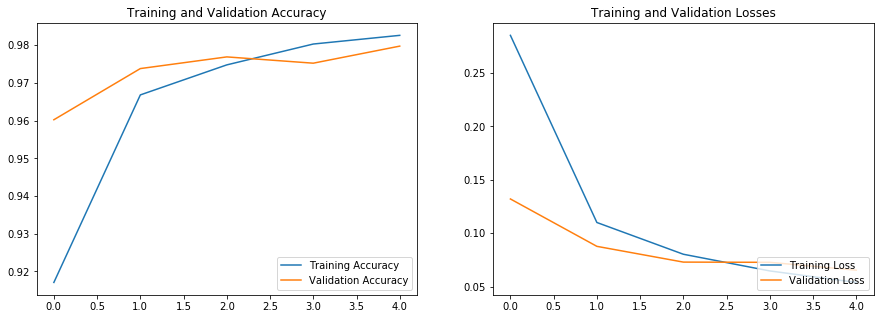

In [52]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(5),history.history['accuracy'],label='Training Accuracy')
plt.plot(range(5),history.history['val_accuracy'],label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1,2,2)
plt.plot(range(5),history.history['loss'],label='Training Loss')
plt.plot(range(5),history.history['val_loss'],label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Losses')

# prediction on single image

In [69]:
random_image = val_imgs_exp[800]

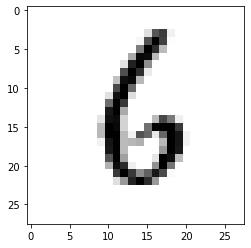

In [70]:
plot_img(random_image)

In [71]:
random_image = random_image.reshape((1,28,28,1))
prediction = classifier.predict_proba(random_image)

In [72]:
classifier.predict_classes(random_image)

array([6], dtype=int64)

In [73]:
classifier.save('Image Digit _recognizer')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: Image Digit _recognizer\assets


# predictons of model on test data

In [75]:
test_dataset = pd.read_csv('test.csv')

In [76]:
test_dataset.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel

In [81]:
# for images ids
submission = pd.read_csv('sample_submission.csv')
print(submission.shape)
submission.head()


(28000, 2)


,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [82]:
test_imgs = test_dataset.values
#normalise the images
test_imgs = test_imgs/255.0
test_imgs_exp  = test_imgs.reshape((test_imgs.shape[0],28,28,1))

In [83]:
print(test_imgs.shape)
print(test_imgs_exp.shape)

(28000, 784)
(28000, 28, 28, 1)


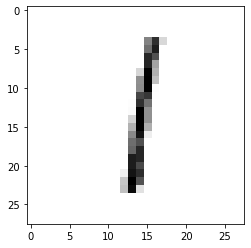

In [91]:
#plotting any image form test set
plot_img(test_imgs_exp[800])

In [88]:
#predicting the test set labels
test_pridiction = classifier.predict_classes(test_imgs_exp)

In [92]:
test_pridiction[800]

1

In [93]:
# adding in submission
submission['Label'] = test_pridiction

In [94]:
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [108]:
submission.to_csv('final_submission1.csv',index=False)

In [107]:
submission.to_csv?

In [109]:
from sklearn.metrics import confusion_matrix
val_pridiction = classifier.predict_classes(val_imgs_exp)
cm = confusion_matrix(val_labels,val_pridiction)
cm

array([[402,   0,   0,   0,   0,   1,   1,   2,   1,   1],
       [  0, 469,   1,   0,   0,   0,   0,   1,   0,   0],
       [  0,   1, 403,   1,   5,   0,   0,   8,   2,   0],
       [  0,   0,   0, 497,   0,   2,   0,   6,   0,   1],
       [  0,   0,   0,   0, 392,   0,   1,   0,   0,   4],
       [  1,   0,   0,   3,   0, 335,   0,   0,   0,   0],
       [  0,   3,   0,   0,   0,   4, 395,   0,   0,   0],
       [  0,   0,   2,   0,   2,   1,   0, 432,   0,   1],
       [  1,   0,   1,   2,   3,   4,   1,   1, 389,   1],
       [  0,   0,   1,   4,   2,   1,   0,   4,   3, 401]], dtype=int64)